In [257]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [258]:
pd.set_option('display.MAX_COLUMNS', None)
data = pd.read_csv('CSI_6_ARI_CW_2_26.csv')
data.head()

,Gender,CustomerType,Age,TypeOfTravel,Class,FlightDistance,InflightWifiService,DepartureArrivalTimeConvenient,EaseOfOnlineBooking,GateLocation,FoodAndDrink,OnlineBoarding,SeatComfort,InflightEntertainment,OnboardService,LegRoomService,BaggageHandling,CheckinService,InflightService,Cleanliness,DepartureDelayInMinutes,ArrivalDelayInMinutes,satisfaction
0,Male,Loyal Customer,40,Business travel,Business,2969,3,3,3,3,5,5,5,5,5,5,5,5,5,4,0,5.0,satisfied
1,Female,Loyal Customer,13,Personal Travel,Eco,668,3,5,3,4,3,3,3,3,3,2,5,4,5,3,0,0.0,neutral or dissatisfied
2,Female,disloyal Customer,42,Business travel,Business,868,5,5,5,1,2,5,2,2,5,4,5,3,4,2,2,8.0,satisfied
3,Male,disloyal Customer,40,Business travel,Business,309,3,3,3,3,2,3,2,2,3,2,5,4,4,2,0,0.0,neutral or dissatisfied
4,Female,disloyal Customer,23,Business travel,Eco Plus,325,3,3,3,2,4,3,4,4,1,4,1,4,5,4,9,6.0,neutral or dissatisfied


In [259]:
data.dtypes

Gender                             object
CustomerType                       object
Age                                 int64
TypeOfTravel                       object
Class                              object
FlightDistance                      int64
InflightWifiService                 int64
DepartureArrivalTimeConvenient      int64
EaseOfOnlineBooking                 int64
GateLocation                        int64
FoodAndDrink                        int64
OnlineBoarding                      int64
SeatComfort                         int64
InflightEntertainment               int64
OnboardService                      int64
LegRoomService                      int64
BaggageHandling                     int64
CheckinService                      int64
InflightService                     int64
Cleanliness                         int64
DepartureDelayInMinutes             int64
ArrivalDelayInMinutes             float64
satisfaction                       object
dtype: object

In [260]:
data = data.drop(columns=['ArrivalDelayInMinutes'], axis=1)
cat_cols = [col for col in data.columns if data[col].dtype == 'object']
mis_cols = [col for col in data.columns if data[col].isnull().any()]
inti_cols = [col for col in data.columns if data[col].dtype in ['int64', 'float64']]
data.columns

Index(['Gender', 'CustomerType', 'Age', 'TypeOfTravel', 'Class',
       'FlightDistance', 'InflightWifiService',
       'DepartureArrivalTimeConvenient', 'EaseOfOnlineBooking', 'GateLocation',
       'FoodAndDrink', 'OnlineBoarding', 'SeatComfort',
       'InflightEntertainment', 'OnboardService', 'LegRoomService',
       'BaggageHandling', 'CheckinService', 'InflightService', 'Cleanliness',
       'DepartureDelayInMinutes', 'satisfaction'],
      dtype='object')

In [261]:
data_dup = cat_cols.copy()

In [262]:
gender

['Satisfied Male', 'Satisfied Female', 'Unsatisfied Male', 'Unatisfied Female']

In [263]:
satis_female = len(data[(data['Gender'] == 'Female') & (data['satisfaction'] == 'satisfied')])
unsatis_female = len(data[(data['Gender'] == 'Female') & (data['satisfaction'] == 'neutral or dissatisfied')])
satis_male = len(data[(data['Gender'] == 'Male') & (data['satisfaction'] == 'satisfied')])
unsatis_male = len(data[(data['Gender'] == 'Male') & (data['satisfaction'] == 'neutral or dissatisfied')])

In [264]:
gender = ['Satisfied Male', 'Satisfied Female', 'Unsatisfied Male', 'Unatisfied Female']
gender_count = [satis_male, satis_female, unsatis_male, unsatis_female]

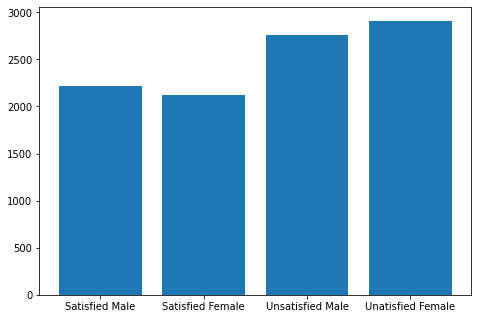

In [265]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(gender,gender_count)
plt.show()

In [266]:
encoder = OrdinalEncoder()
data[cat_cols] = encoder.fit_transform(data[cat_cols])

In [267]:
scaler = MinMaxScaler()
data[int_col] = scaler.fit_transform(data[int_col])

In [268]:
data.head()

,Gender,CustomerType,Age,TypeOfTravel,Class,FlightDistance,InflightWifiService,DepartureArrivalTimeConvenient,EaseOfOnlineBooking,GateLocation,FoodAndDrink,OnlineBoarding,SeatComfort,InflightEntertainment,OnboardService,LegRoomService,BaggageHandling,CheckinService,InflightService,Cleanliness,DepartureDelayInMinutes,satisfaction
0,1.0,0.0,0.423077,0.0,0.0,0.657124,0.6,0.6,0.6,0.50,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.00,1.0,0.8,0.000000,1.0
1,0.0,0.0,0.076923,1.0,1.0,0.142474,0.6,1.0,0.6,0.75,0.6,0.6,0.50,0.6,0.6,0.4,1.0,0.75,1.0,0.6,0.000000,0.0
2,0.0,1.0,0.448718,0.0,0.0,0.187206,1.0,1.0,1.0,0.00,0.4,1.0,0.25,0.4,1.0,0.8,1.0,0.50,0.8,0.4,0.002454,1.0
3,1.0,1.0,0.423077,0.0,0.0,0.062178,0.6,0.6,0.6,0.50,0.4,0.6,0.25,0.4,0.6,0.4,1.0,0.75,0.8,0.4,0.000000,0.0
4,0.0,1.0,0.205128,0.0,2.0,0.065757,0.6,0.6,0.6,0.25,0.8,0.6,0.75,0.8,0.2,0.8,0.0,0.75,1.0,0.8,0.011043,0.0


In [269]:
y = data.iloc[:, -1].values
X = data.iloc[:, 0:-1].values

In [270]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=1)

In [271]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.models.Sequential()
model.add(layers.Dense(12, input_shape=(21,), activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [272]:
model.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [273]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='loss', patience=10, min_delta=0)

In [274]:
model.fit(X_train, y_train, epochs=200, callbacks=[callback])

Epoch 1/200
250/250 [==============================] - 0s 1ms/step - loss: 0.5662 - accuracy: 0.7349
Epoch 2/200
250/250 [==============================] - 1s 3ms/step - loss: 0.3961 - accuracy: 0.8328: 0s - loss: 0.4006 - accuracy: 
Epoch 3/200
250/250 [==============================] - 0s 2ms/step - loss: 0.3569 - accuracy: 0.8570
Epoch 4/200
250/250 [==============================] - 0s 1ms/step - loss: 0.3388 - accuracy: 0.8641
Epoch 5/200
250/250 [==============================] - 0s 1ms/step - loss: 0.3158 - accuracy: 0.8754
Epoch 6/200
250/250 [==============================] - 0s 1ms/step - loss: 0.2905 - accuracy: 0.8826
Epoch 7/200
250/250 [==============================] - 0s 1ms/step - loss: 0.2703 - accuracy: 0.8905
Epoch 8/200
250/250 [==============================] - 0s 1ms/step - loss: 0.2518 - accuracy: 0.8994
Epoch 9/200
250/250 [==============================] - 0s 1ms/step - loss: 0.2379 - accuracy: 0.9045
Epoch 10/200
250/250 [==============================] - 0s 

250/250 [==============================] - 0s 1ms/step - loss: 0.1336 - accuracy: 0.9476
Epoch 82/200
250/250 [==============================] - 0s 1ms/step - loss: 0.1344 - accuracy: 0.9466
Epoch 83/200
250/250 [==============================] - 0s 1ms/step - loss: 0.1330 - accuracy: 0.9470
Epoch 84/200
250/250 [==============================] - 0s 1ms/step - loss: 0.1319 - accuracy: 0.9474
Epoch 85/200
250/250 [==============================] - 0s 1ms/step - loss: 0.1353 - accuracy: 0.9466
Epoch 86/200
250/250 [==============================] - 0s 1ms/step - loss: 0.1324 - accuracy: 0.9474
Epoch 87/200
250/250 [==============================] - 0s 1ms/step - loss: 0.1312 - accuracy: 0.9479
Epoch 88/200
250/250 [==============================] - 0s 1ms/step - loss: 0.1330 - accuracy: 0.9452
Epoch 89/200
250/250 [==============================] - 0s 1ms/step - loss: 0.1307 - accuracy: 0.9484
Epoch 90/200
250/250 [==============================] - 0s 1ms/step - loss: 0.1316 - accuracy: 

250/250 [==============================] - 0s 1ms/step - loss: 0.1223 - accuracy: 0.9501
Epoch 161/200
250/250 [==============================] - 0s 1ms/step - loss: 0.1222 - accuracy: 0.9498
Epoch 162/200
250/250 [==============================] - 0s 1ms/step - loss: 0.1215 - accuracy: 0.9506
Epoch 163/200
250/250 [==============================] - 0s 1ms/step - loss: 0.1195 - accuracy: 0.9511
Epoch 164/200
250/250 [==============================] - 0s 1ms/step - loss: 0.1211 - accuracy: 0.9515
Epoch 165/200
250/250 [==============================] - 0s 1ms/step - loss: 0.1226 - accuracy: 0.9494
Epoch 166/200
250/250 [==============================] - 0s 1ms/step - loss: 0.1201 - accuracy: 0.9517
Epoch 167/200
250/250 [==============================] - 0s 992us/step - loss: 0.1207 - accuracy: 0.9505
Epoch 168/200
250/250 [==============================] - 0s 1ms/step - loss: 0.1226 - accuracy: 0.9476
Epoch 169/200
250/250 [==============================] - 0s 1ms/step - loss: 0.1211 -

<AxesSubplot:>

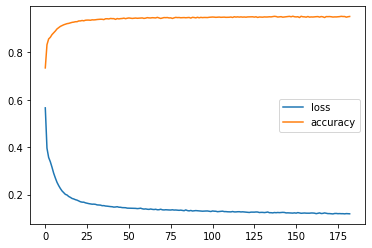

In [275]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [277]:
preds = model.predict(X_valid)
preds
preds = preds.round().astype(int)
preds

array([[0],
       [0],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [165]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_valid, preds)
print(cm)
accu = accuracy_score(y_valid, preds)

[[1098   33]
 [  54  815]]


In [166]:
print('Accuracy Score: ', accu)

Accuracy Score:  0.9565


In [167]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [170]:
y_pred = gnb.predict(X_valid)

array([0., 0., 0., ..., 1., 0., 1.])

In [171]:
cm = confusion_matrix(y_valid, y_pred)
print(cm)
accu_2 = accuracy_score(y_valid, y_pred)

[[1032   99]
 [ 173  696]]


In [389]:
print('Accuracy Score: ', accu_2*100, '%')

Accuracy Score:  86.4 %


In [390]:
from sklearn.svm import SVC
  
# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)
  
prediction = svc_model .predict(X_valid)
# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_valid, y_valid))

0.87375
0.87


In [177]:
print("Confusion Matrix:\n",confusion_matrix(prediction,y_valid))
accu_3 = accuracy_score(y_valid, prediction)

Confusion Matrix:
 [[1038  167]
 [  93  702]]


In [178]:
print('Accuracy Score: ', accu_3)

Accuracy Score:  0.87


In [244]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [245]:
y_pred = classifier.predict(X_valid)

In [246]:
cm = confusion_matrix(y_valid, y_pred)
accu_4 = accuracy_score(y_valid,y_pred)

In [388]:
print('Accuracy Score: ', accu_4*100, '%')
cm

Accuracy Score:  90.85 %


array([[1093,   38],
       [ 145,  724]])

In [364]:
from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier(n_estimators=500, max_depth=15)
regressor.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=500)

In [365]:
reg_pred = regressor.predict(X_valid)
reg_pred = reg_pred.astype(int)

In [366]:
reg_cm = confusion_matrix(y_valid, reg_pred)
accu_5 = accuracy_score(y_valid,reg_pred)

In [367]:
print(reg_cm)
print(accu_5)

[[1098   33]
 [  57  812]]
0.955


In [363]:
data.columns

Index(['Gender', 'CustomerType', 'Age', 'TypeOfTravel', 'Class',
       'FlightDistance', 'InflightWifiService',
       'DepartureArrivalTimeConvenient', 'EaseOfOnlineBooking', 'GateLocation',
       'FoodAndDrink', 'OnlineBoarding', 'SeatComfort',
       'InflightEntertainment', 'OnboardService', 'LegRoomService',
       'BaggageHandling', 'CheckinService', 'InflightService', 'Cleanliness',
       'DepartureDelayInMinutes', 'satisfaction'],
      dtype='object')

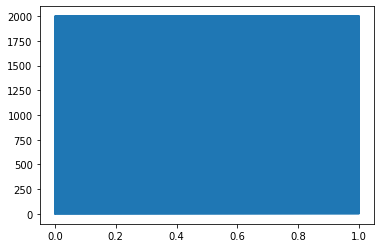

In [377]:
plt.plot(y_valid, list(range(0, 2000)))

In [386]:
y_val = pd.Series(y_valid)
y_val.value_counts()

0.0    1131
1.0     869
dtype: int64

In [387]:
1131-46

1085